Tools and Libraries


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.register_matplotlib_converters()

In [4]:
import numpy as np
import random

In [5]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [6]:
random.seed(12)

Loading Dataset

In [7]:
file_path = r"C:\Users\HP PAVILION 15\Desktop\The_come_up\Rain in Australia\weatherAUS.csv"

weather = pd.read_csv(file_path, parse_dates=['Date'])

Data Exploration and Visualization

In [8]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [10]:
weather.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


In [11]:
# Separating predictors from labels
weather_labels = weather["RainTomorrow"]
weather_features = weather.drop("RainTomorrow", axis=1)

In [12]:
# Checking feature class balance in dataset
weather_labels.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [13]:
# Splitting Dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(weather_features, weather_labels, test_size=0.15, random_state=23)
X_train, x_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=23) # creating validation set from training set

In [14]:
X_train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [15]:
atts1 = []
atts2 = []
num_attributes = []

def split_num_featurenames(dataframe):
    num_attributes = list(feature for feature in dataframe.columns if pd.api.types.is_numeric_dtype(dataframe[feature]))
    # split numerical attributes into two lists
    half_length = len(num_attributes) // 2
    list1 = num_attributes[:half_length]
    list2 = num_attributes[half_length:]

    return list1, list2, num_attributes

atts1, atts2, num_attributes = split_num_featurenames(X_train)
atts2

['Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

<Figure size 640x480 with 0 Axes>

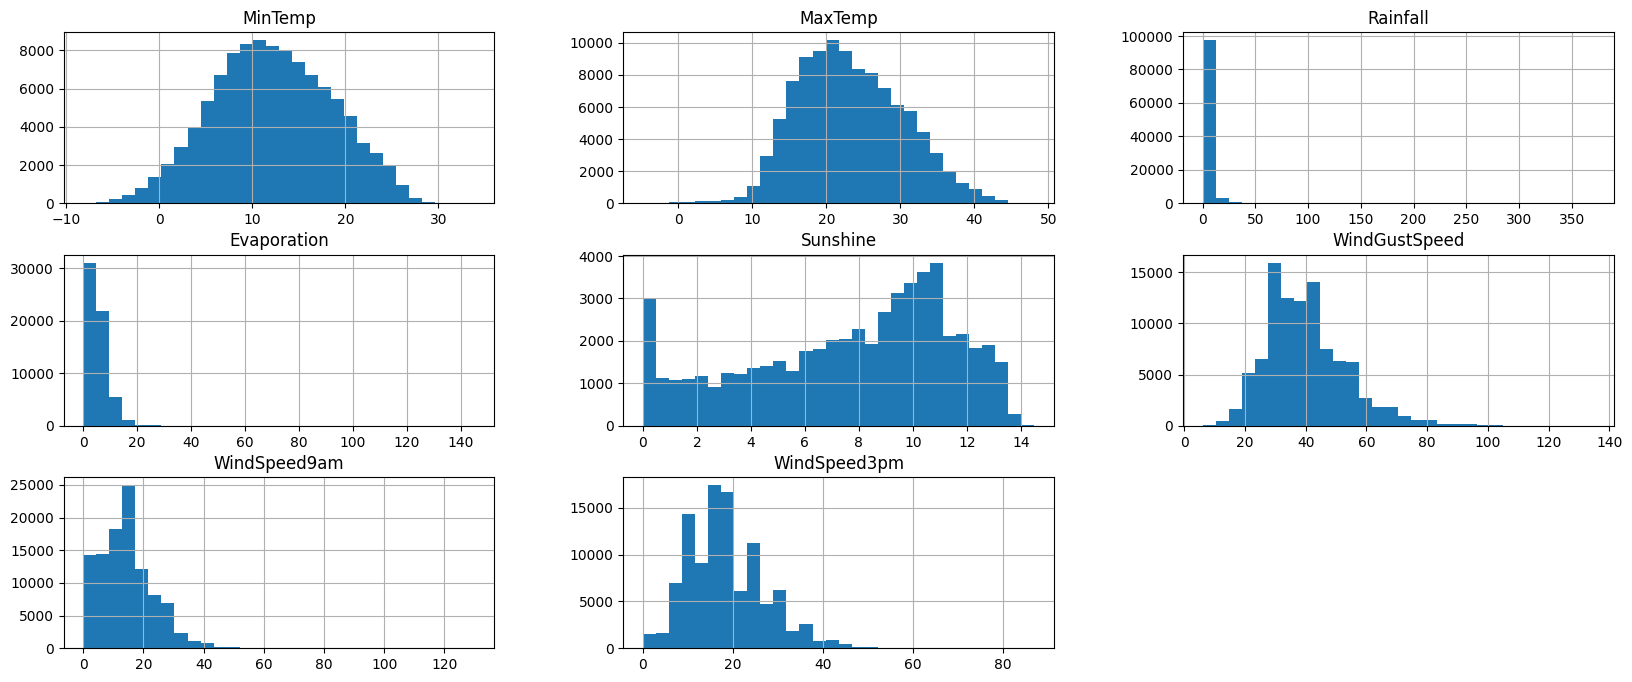

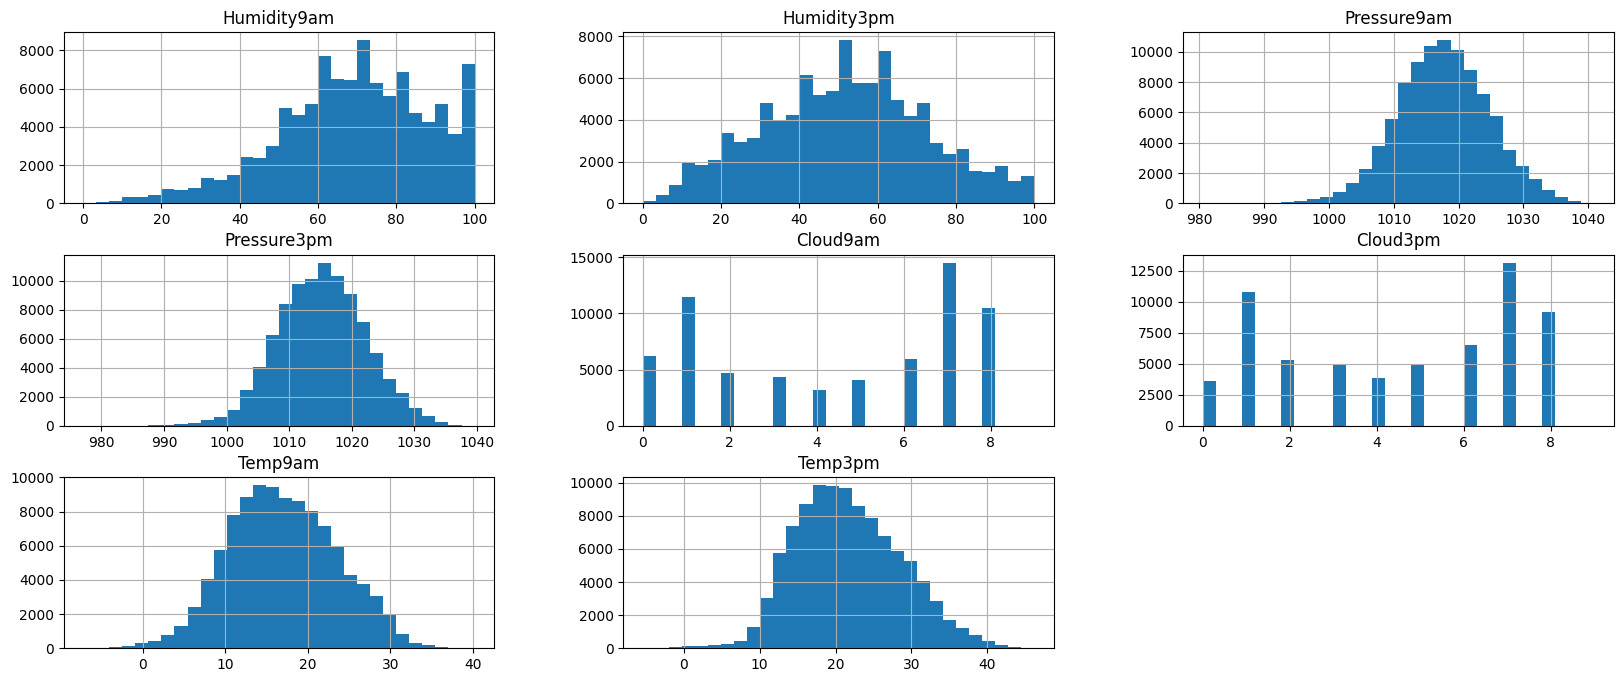

In [16]:
# Observing Attribute histograms in groups on distinct axes
plt.figure(1)
X_train[atts1].hist(bins=30, figsize=(20, 8))
plt.figure(2)
X_train[atts2].hist(bins=30, figsize=(20, 8))
plt.show()

Data Cleaning and preparation 

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105094 entries, 27291 to 128561
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           105094 non-null  datetime64[ns]
 1   Location       105094 non-null  object        
 2   MinTemp        104038 non-null  float64       
 3   MaxTemp        104206 non-null  float64       
 4   Rainfall       102750 non-null  float64       
 5   Evaporation    59825 non-null   float64       
 6   Sunshine       54749 non-null   float64       
 7   WindGustDir    97653 non-null   object        
 8   WindGustSpeed  97701 non-null   float64       
 9   WindDir9am     97489 non-null   object        
 10  WindDir3pm     102062 non-null  object        
 11  WindSpeed9am   103851 non-null  float64       
 12  WindSpeed3pm   102923 non-null  float64       
 13  Humidity9am    103229 non-null  float64       
 14  Humidity3pm    101904 non-null  float64       
 15  P

In [19]:
# Function to separate numerical from categorical attributes

def num_cat_separator(dataframe, num_attribs):
    numerical_df = dataframe[num_attribs]
    categorical_df = dataframe.drop(num_attribs, axis=1)
    
    return categorical_df, numerical_df

In [20]:
X_train_cat, X_train_num = num_cat_separator(X_train, num_attributes)

In [21]:
X_train_num = pd.concat([X_train_num, X_train['Date']], axis=1)
X_train_cat = pd.concat([X_train_cat, X_train['Date']], axis=1)

In [23]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
27291,2009-05-05,Richmond,9.7,20.5,0.0,1.9,NaN,S,28.0,NE,...,9.0,87.0,52.0,1031.1,1028.1,NaN,NaN,14.4,20.1,No
119029,2013-01-01,PerthAirport,24.3,32.0,0.0,10.0,8.5,NW,37.0,NW,...,19.0,61.0,61.0,1009.1,1009.1,1.0,5.0,29.3,28.7,No
102360,2016-12-15,MountGambier,4.9,21.0,0.0,NaN,NaN,SSE,48.0,SE,...,24.0,59.0,55.0,1020.6,1017.1,7.0,NaN,14.8,19.3,No
32716,2015-04-14,Sydney,14.5,22.4,0.0,4.2,8.5,ENE,24.0,WNW,...,17.0,63.0,54.0,1023.9,1021.4,5.0,3.0,18.2,20.8,No
41860,2015-08-09,Williamtown,4.5,17.8,0.0,9.8,9.6,SE,28.0,WNW,...,17.0,79.0,53.0,1024.6,1019.6,5.0,1.0,9.8,16.6,No
